In [2]:

import pandas as pd
pd.set_option('display.width', 10000)

df = pd.read_csv('chopin_winners.csv')
print(df)


            year                                     1st                                       2nd                               3rd
0       I (1927)                 Lev Oborin Soviet Union               Stanisław Szpinalski Poland               Róża Etkin - Poland
1      II (1932)    Alexander Uninsky (c) - Soviet Union                  Imre Ungár (c) - Hungary             Bolesław Kon - Poland
2     III (1937)                Yakov Zak - Soviet Union             Rosa Tamarkina - Soviet Union       Witold Małcużyński - Poland
3      IV (1949)         Bella Davidovich - Soviet Union           Barbara Hesse-Bukowska - Poland     Waldemar Maciszewski - Poland
4            NaN  Halina Czerny-Stefańska - Poland (tie)                                       NaN                               NaN
5       V (1955)               Adam Harasiewicz - Poland         Vladimir Ashkenazy - Soviet Union                Fou Ts'ong - China
6      VI (1960)                Maurizio Pollini - Italy           Ir

In [3]:
pd.set_option('display.max_rows', 100)
# Melt the DataFrame to long format
df_long = df.melt(id_vars=["year"], value_vars=["1st", "2nd", "3rd"],
                  var_name="Position", value_name="Name_Country")

# Extract Name and Country
df_long[["Name", "Country"]] = df_long["Name_Country"].str.extract(r"^(.*?) - (.*)$")

# Drop the Name_Country column and remove rows with missing values
df_long.drop("Name_Country", axis=1, inplace=True)

# Remove rows with missing values
df_long.dropna(inplace=True)

# Extract the year
df_long['year'] = df_long['year'].str.extract(r'(\d{4})').astype(int)

# Sort the DataFrame by year and Position
df_long.sort_values(by=["year", "Position"], inplace=True)
print(df_long)


    year Position                      Name           Country
46  1927      3rd                Róża Etkin            Poland
1   1932      1st     Alexander Uninsky (c)      Soviet Union
24  1932      2nd            Imre Ungár (c)           Hungary
47  1932      3rd              Bolesław Kon            Poland
2   1937      1st                 Yakov Zak      Soviet Union
25  1937      2nd            Rosa Tamarkina      Soviet Union
48  1937      3rd        Witold Małcużyński            Poland
3   1949      1st          Bella Davidovich      Soviet Union
26  1949      2nd    Barbara Hesse-Bukowska            Poland
49  1949      3rd      Waldemar Maciszewski            Poland
5   1955      1st          Adam Harasiewicz            Poland
28  1955      2nd        Vladimir Ashkenazy      Soviet Union
51  1955      3rd                Fou Ts'ong             China
6   1960      1st          Maurizio Pollini             Italy
29  1960      2nd          Irina Zaritskaya      Soviet Union
52  1960

In [4]:
import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender("Dang Thai Son"))

# Function to guess gender
def guess_gender(name):
    first_name = name.split()[0]
    return d.get_gender(first_name)

# Apply the function to the 'Name' column
df_long['Gender'] = df_long['Name'].apply(lambda x: guess_gender(x) if pd.notnull(x) else None)
print(df_long)

unknown
    year Position                      Name           Country   Gender
46  1927      3rd                Róża Etkin            Poland   female
1   1932      1st     Alexander Uninsky (c)      Soviet Union     male
24  1932      2nd            Imre Ungár (c)           Hungary     male
47  1932      3rd              Bolesław Kon            Poland     male
2   1937      1st                 Yakov Zak      Soviet Union     male
25  1937      2nd            Rosa Tamarkina      Soviet Union   female
48  1937      3rd        Witold Małcużyński            Poland     male
3   1949      1st          Bella Davidovich      Soviet Union   female
26  1949      2nd    Barbara Hesse-Bukowska            Poland   female
49  1949      3rd      Waldemar Maciszewski            Poland     male
5   1955      1st          Adam Harasiewicz            Poland     male
28  1955      2nd        Vladimir Ashkenazy      Soviet Union     male
51  1955      3rd                Fou Ts'ong             China  unknow

In [5]:
import pandas as pd
import tabulate
pd.set_option('display.max_rows', None)


df = pd.read_csv('chopin_winners_full.csv')
print(df)

    year Position                      Name           Country  Gender
0   1927      3rd                Róża Etkin            Poland  female
1   1932      1st     Alexander Uninsky (c)      Soviet Union    male
2   1932      2nd            Imre Ungár (c)           Hungary    male
3   1932      3rd              Bolesław Kon            Poland    male
4   1937      1st                 Yakov Zak      Soviet Union    male
5   1937      2nd            Rosa Tamarkina      Soviet Union  female
6   1937      3rd        Witold Małcużyński            Poland    male
7   1949      1st          Bella Davidovich      Soviet Union  female
8   1949      2nd    Barbara Hesse-Bukowska            Poland  female
9   1949      3rd      Waldemar Maciszewski            Poland    male
10  1955      1st          Adam Harasiewicz            Poland    male
11  1955      2nd        Vladimir Ashkenazy      Soviet Union    male
12  1955      3rd                Fou Ts'ong             China    male
13  1960      1st   

In [6]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)


Gender
male      33
female    16
Name: count, dtype: int64


In [7]:
top_countries = df['Country'].value_counts().head(10)
print(top_countries)


Country
Poland           11
Soviet Union     11
United States     3
Japan             3
Russia            3
China             2
South Korea       2
Canada            2
France            2
Argentina         2
Name: count, dtype: int64


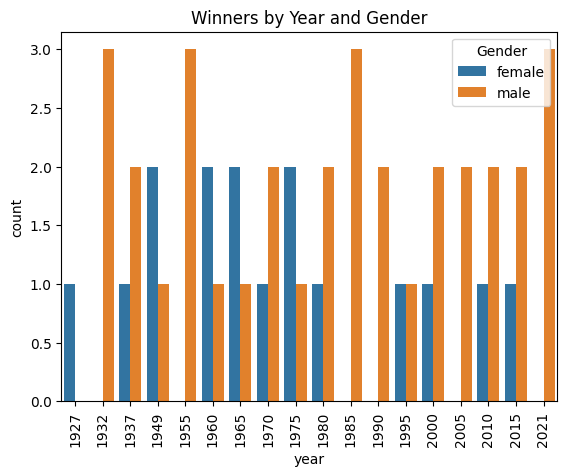

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='year', hue='Gender')
plt.xticks(rotation=90)
plt.title('Winners by Year and Gender')
plt.show()


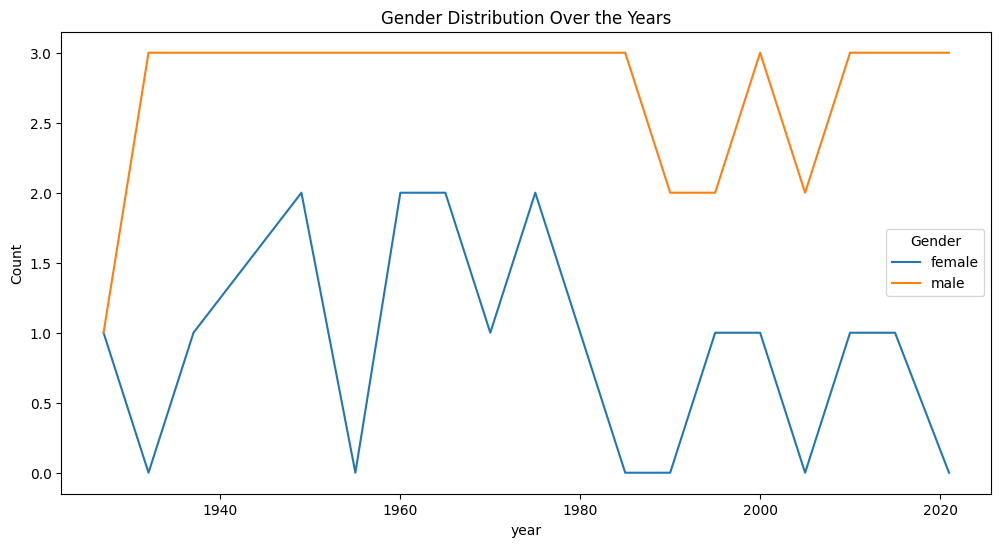

In [11]:
gender_year = df.groupby(['year', 'Gender']).size().unstack().fillna(0)
gender_year.plot(kind='line', stacked=True, figsize=(12,6))
plt.title('Gender Distribution Over the Years')
plt.ylabel('Count')
plt.show()
